#***1. step : Gather Data: images ***


In [ ]:
!pip install bing-image-downloader

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 190 µs (started: 2021-02-03 13:23:46 +00:00)


In [ ]:
from bing_image_downloader import downloader
downloader.download("rose", limit=30, output_dir='images', adult_filter_off='True')



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.cowellsgc.co.uk/files/images/webshop/rose-my-lovely-mum-keep-smiling-1546548287_l.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://3.bp.blogspot.com/-PTMcU3iDimQ/UFAkJx8jQOI/AAAAAAAADEk/67ZUjOWUIrU/s1600/rose+sybmolism.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://garden.org/pics/2016-05-22/cliftoncat/930e46.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.cowellsgc.co.uk/files/images/webshop/rose-sheila-s-perfume-1545222825_l.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images.wallpaperscraft.com/image/rose_flower_white_143143_4000x6000.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.gardeningknowhow.com/wp-content/uploads/2015/03/osiria-rose.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.wallpapergeeks.com/wp-content/uploads/2014/02/Hybrid-Tea-Rose-Wallpaper.jpg
[%] Fil

In [ ]:
downloader.download("icecream", limit=30, output_dir='images', adult_filter_off='True')



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/3/31/Ice_Cream_dessert_02.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://thumbs.dreamstime.com/z/icecream-622656.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://4.bp.blogspot.com/_lqE2cygBFbk/THKsjbnahzI/AAAAAAAABOg/wqTOYTjPFKA/s1600/chocpbicecream.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.yourhomebasedmom.com/wp-content/uploads/2019/08/birthday-cake-ice-cream-recipe.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://jfostericecream.com/img/Sundae300.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.clubcrafted.com/wp-content/uploads/2017/07/coffee-and-donuts-ice-cream-2.jpg
[!] Issue getting: https://www.clubcrafted.com/wp-content/uploads/2017/07/coffee-and-donuts-ice-cream-2.jpg
[!] Error:: <urlopen error [Errno 104] Connection reset by peer>
[%] Downloadin

In [ ]:
downloader.download("sport shoes", limit=30, output_dir='images', adult_filter_off='True')



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://www.stylesglamour.com/wp-content/uploads/2015/01/Reebok-Sports-shoes-and-running-shoes-for-men-15.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://n1.sdlcdn.com/imgs/a/u/9/Sparx-Navy-Sports-Shoes-SDL773261811-1-ae5e3.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.stylesglamour.com/wp-content/uploads/2015/01/Reebok-running-shoes-and-sportsshoes-for-women-10.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://n1.sdlcdn.com/imgs/a/x/4/Asian-Black-Eva-Sport-Shoes-SDL779499354-1-9bed5.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images.naptol.com/usr/local/csp/staticContent/product_images/horizontal/750x750/NikeZoom-33-Blue-3.jpg
[!] Issue getting: https://images.naptol.com/usr/local/csp/staticContent/product_images/horizontal/750x750/NikeZoom-33-Blue-3.jpg
[!] Error:: <urlopen error [Errno 110] Connection timed out>
[%] Downlo

***2. step: Preprocessing***

1. Resize 
2. flatten


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize

time: 793 ms (started: 2021-02-03 13:39:32 +00:00)


In [ ]:
target=[]
images=[]
flat_data=[]

DATADIR= '/content/images'
CATEGORIES =['ICECREAM','ROSE','SHOES']

time: 1.71 ms (started: 2021-02-03 14:35:19 +00:00)


In [ ]:
for category in CATEGORIES:
  print(category)

ICECREAM
ROSE
SHOES
time: 2.12 ms (started: 2021-02-03 14:35:25 +00:00)


In [ ]:
for category in CATEGORIES:
  class_num= CATEGORIES.index(category) #label encoding the values
  path = os.path.join(DATADIR, category) #create path to use all the images
  for img in os.listdir(path):
    img_array = imread (os.path.join(path,img))
    #print(img_array)   these # are fewoutputs you can see.
    #print(img_array.shape)
    #plt.imshow(img_array)
    #break
    img_resized = resize(img_array, (150,150,3))                   #resize (Normalizes the value from 0 to 1)
    flat_data.append(img_resized.flatten())                         #flatten
    images.append(img_resized)
    target.append(class_num)
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 1min 2s (started: 2021-02-03 14:35:52 +00:00)


In [ ]:
#EXAMPLE FOR FLATTING THE MATRIX
#how to flatten the matrix?
import numpy as np
a = np.array([[1,2,3,4,5],
              [4,5,6,7,8]])
a.ndim
#now use flatten function
a.flatten()

array([1, 2, 3, 4, 5, 4, 5, 6, 7, 8])

time: 5.4 ms (started: 2021-02-03 14:26:41 +00:00)


In [ ]:
flat_data[0]

array([0.74901961, 0.79607843, 0.84313725, ..., 0.05490196, 0.12156863,
       0.14509804])

time: 5.25 ms (started: 2021-02-03 14:37:55 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 6.2 ms (started: 2021-02-03 14:42:20 +00:00)


<BarContainer object of 3 artists>

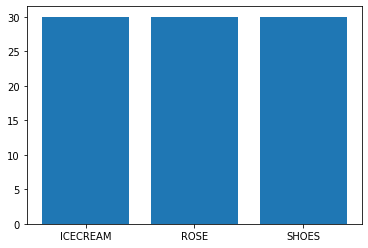

time: 129 ms (started: 2021-02-03 14:46:49 +00:00)


In [ ]:
unique,count = np.unique(target, return_counts=True)
plt.bar(CATEGORIES,count)

# 3. STEP :SPLIT DATA INTO TRAINING  AND TESTING 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data, target, test_size= 0.3, random_state=109)

time: 24.6 ms (started: 2021-02-03 15:57:34 +00:00)


we are using model SVM(support vector machine)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C' : [1,10,100,1000], 'kernel': ['linear']},
              {'C':[1,10,100,1000], 'gamma':[0.001,0.0001] ,'kernel': ['rbf']},
              ]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 49s (started: 2021-02-03 15:57:41 +00:00)


In [ ]:
y_predit= clf.predict(x_test)
y_predit

array([1, 0, 1, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 188 ms (started: 2021-02-03 16:01:36 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_predit,y_test)

0.8888888888888888

time: 3.59 ms (started: 2021-02-03 16:03:39 +00:00)


In [ ]:
confusion_matrix(y_predit,y_test)

array([[7, 2, 0],
       [1, 9, 0],
       [0, 0, 8]])

time: 3.55 ms (started: 2021-02-03 16:05:37 +00:00)


SAVE THE MODEL USING PICKLE LIBRARY


In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 70.7 ms (started: 2021-02-03 16:20:04 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 23.4 ms (started: 2021-02-03 16:20:08 +00:00)


TESTING A BRAND NEW IMAGE


Enter URLhttps://www.seriouseats.com/2018/06/20180625-no-churn-vanilla-ice-cream-vicky-wasik-13-1500x1125.jpg
(1125, 1500, 3)
PREDICTED OUTPUT: ICECREAM


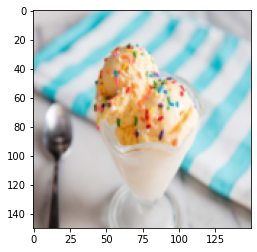

time: 3.67 s (started: 2021-02-03 16:48:46 +00:00)


In [ ]:
flat_data= []
url=input('Enter URL')
img= imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data= np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')